# 6.S083 PSET 1

Rahul Yesantharao

In [3]:
using CSV
using DataFrames
using Interact
using Plots

In [14]:
# download data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv";
download(url, "covid_data.csv")

"covid_data.csv"

## Exercise 1

In [19]:
# read the data
data = CSV.read("covid_data.csv");

In [34]:
# read country data
rename!(data, 1 => "province", 2 => "country") # ! is convention: function *modifies* its argument in place
all_countries = data[1:end, 2]
unique_countries = unique(all_countries)
countries = ["China", "Japan", "Korea, South", "US", "United Kingdom", "France", "Germany"]
findall(in(all_countries),countries)

7-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
 7

In [24]:
num_days = ncol(data) - 4

77

In [40]:
# extract data by country
daily_data_by_country = Dict{String, Array{Int64, 1}}()
for country in countries
    country_df = data[findall(in([country]), data.country), 5:end]
    print("$country: $(nrow(country_df)) rows\n")
    current_country_daily_data = sum(Matrix(country_df), dims=1) # result of this sum is a 1 by num_cols 2d-array
    daily_data_by_country[country] = current_country_daily_data[1, :]
end
daily_data_by_country

China: 33 rows
Japan: 1 rows
Korea, South: 1 rows
US: 1 rows
United Kingdom: 11 rows
France: 11 rows
Germany: 1 rows


Dict{String,Array{Int64,1}} with 7 entries:
  "Germany"        => [0, 0, 0, 0, 0, 1, 4, 4, 4, 5  …  62095, 66885, 71808, 77…
  "United Kingdom" => [0, 0, 0, 0, 0, 0, 0, 0, 0, 2  …  19780, 22453, 25481, 29…
  "China"          => [548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802 …
  "Korea, South"   => [1, 1, 2, 2, 3, 4, 4, 4, 4, 11  …  9583, 9661, 9786, 9887…
  "Japan"          => [2, 2, 2, 2, 4, 4, 7, 7, 11, 15  …  1866, 1866, 1953, 217…
  "France"         => [0, 0, 2, 3, 3, 3, 4, 5, 5, 5  …  40708, 45170, 52827, 57…
  "US"             => [1, 1, 2, 2, 5, 5, 5, 5, 5, 7  …  140909, 161837, 188172,…

In [42]:
using Dates

In [48]:
# x-axis label names
date_strings = String.(names(data))[5:end];  # apply String function to each element
format = Dates.DateFormat("m/d/Y")
dates = parse.(Date, date_strings, format) .+ Year(2000)

77-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07

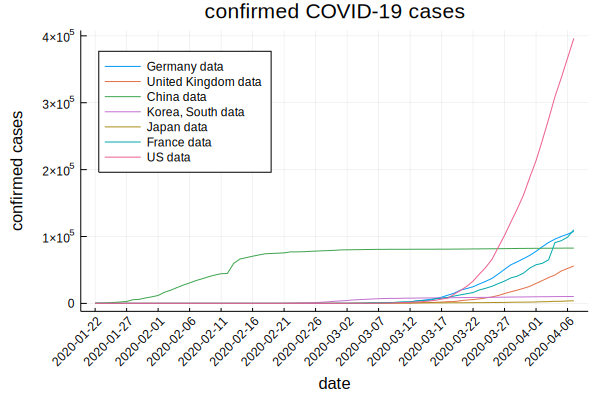

In [76]:
# linear plot
p_linear = plot()
for (country, date_data) in daily_data_by_country
    plot!(p_linear, dates, date_data, xticks=dates[1:5:end], xrotation=45, leg=:topleft, 
    label="$country data")
end
xlabel!(p_linear, "date")
ylabel!(p_linear, "confirmed cases")
title!(p_linear, "confirmed COVID-19 cases")
p_linear

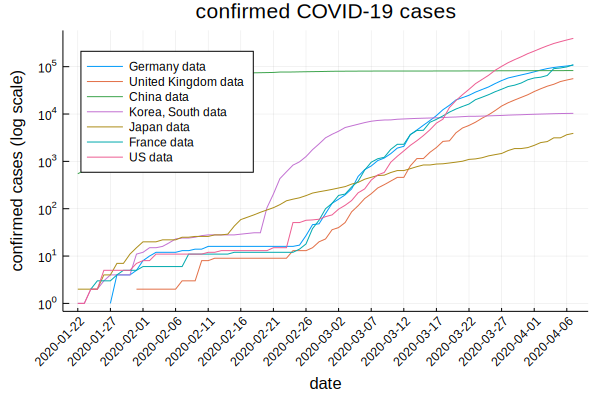

In [75]:
# log plot
p_log = plot()
for (country, date_data) in daily_data_by_country
    fixed_date_data = float(date_data)
    replace!(fixed_date_data, 0=>NaN)
    plot!(p_log, dates, fixed_date_data, xticks=dates[1:5:end], xrotation=45, leg=:topleft, 
    label="$country data", yscale=:log10)
end
xlabel!(p_log, "date")
ylabel!(p_log, "confirmed cases (log scale)")
title!(p_log, "confirmed COVID-19 cases")
p_log

There is exponential growth in several countries!

In [67]:
@manipulate for day in 1:num_days
    cur_xlims=map(Dates.value, (dates[1], dates[day]))
    p = plot(xlims=cur_xlims)
    for (country, date_data) in daily_data_by_country
        plot!(p, dates[1:day], date_data[1:day], xticks=dates[1:5:day], xrotation=45, leg=:topleft, 
        label="$country data", m=:o)
    end
    xlabel!(p, "date")
    ylabel!(p, "confirmed cases")
    title!(p, "confirmed COVID-19 cases ($(dates[1]) - $(dates[day]))")
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 77,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
39, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/rahuly/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/rahuly/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/rahuly/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/rahuly/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/rahuly/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fced2ce0010, Task (runnable) @0x00007fced2ce0010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"3

## Exercise 2

In [68]:
#1
total_cases_to_date = daily_data_by_country

Dict{String,Array{Int64,1}} with 7 entries:
  "Germany"        => [0, 0, 0, 0, 0, 1, 4, 4, 4, 5  …  62095, 66885, 71808, 77…
  "United Kingdom" => [0, 0, 0, 0, 0, 0, 0, 0, 0, 2  …  19780, 22453, 25481, 29…
  "China"          => [548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802 …
  "Korea, South"   => [1, 1, 2, 2, 3, 4, 4, 4, 4, 11  …  9583, 9661, 9786, 9887…
  "Japan"          => [2, 2, 2, 2, 4, 4, 7, 7, 11, 15  …  1866, 1866, 1953, 217…
  "France"         => [0, 0, 2, 3, 3, 3, 4, 5, 5, 5  …  40708, 45170, 52827, 57…
  "US"             => [1, 1, 2, 2, 5, 5, 5, 5, 5, 7  …  140909, 161837, 188172,…

In [71]:
#2
new_cases = Dict{String, Array{Int64, 1}}()
for (country, values) in total_cases_to_date
    new_cases[country] = zeros(length(values))
    for i in 1:length(values)
        new_cases[country][i] = values[i] - (i > 7 ? values[i-7] : 0)
    end
end
new_cases

Dict{String,Array{Int64,1}} with 7 entries:
  "Germany"        => [0, 0, 0, 0, 0, 1, 4, 4, 4, 5  …  37222, 37829, 38822, 40…
  "United Kingdom" => [0, 0, 0, 0, 0, 0, 0, 0, 0, 2  …  14035, 15727, 17317, 20…
  "China"          => [548, 643, 920, 1406, 2075, 2877, 5509, 5539, 7498, 8882 …
  "Korea, South"   => [1, 1, 2, 2, 3, 4, 4, 3, 3, 9  …  622, 700, 749, 750, 735…
  "Japan"          => [2, 2, 2, 2, 4, 4, 7, 5, 9, 13  …  765, 738, 760, 871, 11…
  "France"         => [0, 0, 2, 3, 3, 3, 4, 5, 5, 3  …  24465, 25047, 30205, 32…
  "US"             => [1, 1, 2, 2, 5, 5, 5, 4, 4, 5  …  107633, 117990, 134432,…

In [92]:
@manipulate for day in 1:num_days
    p = plot(leg=:topleft, yscale=:log10, xscale=:log10, ylims=(1, 10^6), xlims=(1, 10^6))
    for country in countries
        # draw the line
        cur_total_cases = float(total_cases_to_date[country][1:day])
        replace!(cur_total_cases, 0=>NaN)
        cur_new_cases = float(new_cases[country][1:day])
        replace!(cur_new_cases, 0=>NaN)
        plot!(p, cur_total_cases, cur_new_cases, label="$country data")
        # draw the dot
        x = cur_total_cases[day]
        y = cur_new_cases[day]
        if(!isnan(x) && !isnan(y))
            scatter!(p, [x], [y], label=nothing)
            annotate!(p, x, y, text(country, 10, :black))
        end
    end
    xlabel!(p, "total confirmed cases")
    ylabel!(p, "new confirmed cases (past week)")
    title!(p, "COVID-19 trends ($(dates[1]) - $(dates[day]))")
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["day"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 77,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
39, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/rahuly/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/rahuly/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/rahuly/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/rahuly/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/rahuly/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007fceda479600, Task (runnable) @0x00007fceda479600), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"3

## Exercise 3

 * Lecture 1: Lines 3-6
 * Lecture 2: Lines 490-495